In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
import gc
import glob
import itertools
import os
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [4]:
sys.path.append("../../..")

In [5]:
from bertrand.immrep.data_sources import read_test, read_train_be
from bertrand.immrep.sample_test_set import sample_test, sample_test_additional, diagnostics
from bertrand.immrep.sample_train_set import sample_train, sample_train_additional

In [6]:
test = read_test()
train = read_train_be()

## Some tests

In [7]:
# test_sample = sample_test(train, test)

In [8]:
test_sample = sample_test_additional(train, test)

GILGFVFTL 1879 0.05
RAKFKQLL 979 0.05
IVTDFSVIK 856 0.05
NLVPMVATV 644 0.05
GLCTLVAML 531 0.05
YLQPRTFLL 394 0.05
TPRVTGGGAM 375 0.05
RPPIFIRRL 341 0.05
VTEHDTLLY 339 0.05
RPHERNGFTVL 294 0.05


In [9]:
test_sample.Peptide.value_counts()

GILGFVFTL      320
RAKFKQLL       294
IVTDFSVIK      258
NLVPMVATV      192
GLCTLVAML      162
YVLDHLIVV      126
GVYDGREHTV     120
SLLQHLIGL      120
YLQPRTFLL      120
TPRVTGGGAM     114
KLVAMGINAV     102
RPPIFIRRL      102
VTEHDTLLY      102
MLDLQPETT       90
RPHERNGFTVL     90
MTLHGHMMY       84
VMVELVAEL       78
Name: Peptide, dtype: int64

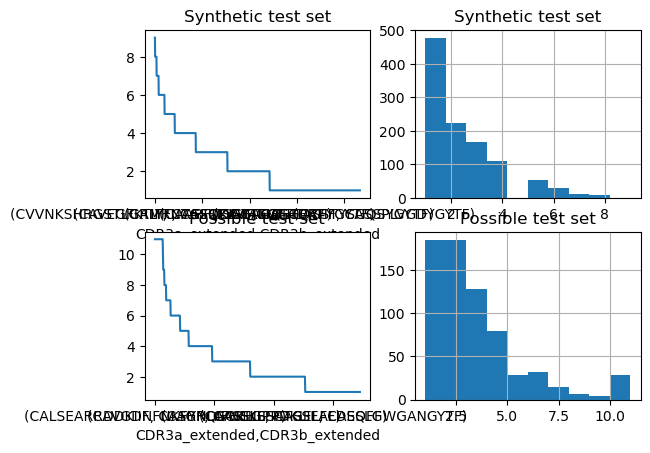

In [10]:
diagnostics(train, test_sample, test)

## Sample train

In [12]:
train_sample = sample_train_additional(
    train, test, test_sample, seed=42, verbose=True
)

len(CDR3a) in [7, 24] len(CDR3b) in  [9, 22]
18664 positive observations total
11827 positive observations filtered
3468 potential negatives  filtered
AVFDRKSDAK    2270
ELAGIGILTV    1028
RLRAEAQVK      815
IVTDFSVIK      487
RLNAALREK      466
              ... 
MMPFSIVYI        8
KMVAVFYNT        8
LLLEWLAMA        8
KVLEYVIKV        8
ITDQVPFSV        8
Name: Peptide, Length: 106, dtype: int64
ALSKGVHFV 115 3445 3420
ALWEIQQVV 105 3447 3434
ATDALMTGF 545 3446 3421
AVASVPIMY 315 3455 3402
AVFDRKSDAK 2500 3014 2783
AYAQKIFKI 60 3456 3454
CINGVCWTV 1120 3423 3368
CLGGLLTMV 405 3452 3266
CTELKLSDY 80 3452 3451
CVNGSCFTV 55 3457 3440
EAAGIGILTV 65 3455 3434
ELAGIGILTV 2500 3262 2981
FLRGRAYGL 760 3438 3240
FLSFHISNL 50 3458 3454
FLYALALLL 140 3440 3429
FTSDYYQLY 190 3430 3424
GILGFVFTL 1835 3395 3103
GLAPPQHLIRV 180 3432 3393
GLCTLVAML 820 3435 3273
GPRLGVRAT 250 3458 3426
GTVGPLGLR 195 3429 3406
GVYAGREHFV 50 3458 3448
HTMGFWLTK 1485 3409 3246
ILNAMIAKI 50 3458 3447
ILTGLNYEA 110 3446 

In [13]:
train_sample.shape

(53770, 4)

In [14]:
train_sample.Peptide.value_counts()

RLRAEAQVK     2928
AVFDRKSDAK    2909
ELAGIGILTV    2898
IVTDFSVIK     2851
RLNAALREK     2709
              ... 
RTLNAWVKV       60
TSQWLTNIF       60
TLWCSPIKV       60
FLSFHISNL       60
GVYAGREHFV      59
Name: Peptide, Length: 93, dtype: int64

In [42]:
train_sample2 = sample_train_additional(
    train, test, test_sample, seed=43, verbose=True
)

len(CDR3a) in [7, 24] len(CDR3b) in  [9, 22]
18664 positive observations total
11827 positive observations filtered
9214 potential negatives  filtered
AVFDRKSDAK    2270
ELAGIGILTV    1028
RLRAEAQVK      815
IVTDFSVIK      487
RLNAALREK      466
              ... 
MMPFSIVYI        8
KMVAVFYNT        8
LLLEWLAMA        8
KVLEYVIKV        8
ITDQVPFSV        8
Name: Peptide, Length: 106, dtype: int64
ALSKGVHFV 115 9191 9157
ALWEIQQVV 105 9193 9152
ATDALMTGF 545 9105 9018
AVASVPIMY 315 9151 9000
AVFDRKSDAK 2500 8714 8018
AYAQKIFKI 60 9202 9190
CINGVCWTV 1120 8990 8810
CLGGLLTMV 405 9133 8438
CTELKLSDY 80 9198 9194
CVNGSCFTV 55 9203 9165
EAAGIGILTV 65 9201 9149
ELAGIGILTV 2500 8714 7986
FLRGRAYGL 760 9062 8274
FLSFHISNL 50 9204 9199
FLYALALLL 140 9186 9165
FTSDYYQLY 190 9176 9145
GILGFVFTL 1835 8847 7963
GLAPPQHLIRV 180 9178 9111
GLCTLVAML 820 9050 8358
GPRLGVRAT 250 9164 9072
GTVGPLGLR 195 9175 9112
GVYAGREHFV 50 9204 9191
HTMGFWLTK 1485 8917 8443
ILNAMIAKI 50 9204 9177
ILTGLNYEA 110 9192 

In [32]:
def compare(s1, s2):
    for pep in np.intersect1d(s1.Peptide, s2.Peptide):
        a = s1.query(f'Peptide == "{pep}"')
        b = s2.query(f'Peptide == "{pep}"')
        posa = a[a.y == 1]
        posb = b[b.y == 1]
        ipos = len(
            np.intersect1d(
                posa.CDR3a_extended + "_" + posa.CDR3b_extended, posb.CDR3a_extended + "_" + posb.CDR3b_extended
            )
        )
        nega = a[a.y == 0]
        negb = b[b.y == 0]
        ineg = len(
            np.intersect1d(
                nega.CDR3a_extended + "_" + nega.CDR3b_extended, negb.CDR3a_extended + "_" + negb.CDR3b_extended
            )
        )
        print(f"{pep} +: {len(posa)}-{ipos}-{len(posb)} -: {len(nega)}-{ineg}-{len(negb)}")

        iposneg = len(
            np.intersect1d(
                posa.CDR3a_extended + "_" + posa.CDR3b_extended, negb.CDR3a_extended + "_" + negb.CDR3b_extended
            )
        )
        inegpos = len(
            np.intersect1d(
                nega.CDR3a_extended + "_" + nega.CDR3b_extended, posb.CDR3a_extended + "_" + posb.CDR3b_extended
            )
        )
        # assert iposneg == 0 and inegpos == 0

In [33]:
compare(train_sample, train_sample2)

ALWEIQQVV +: 21-21-21 -: 105-2-105
ATDALMTGF +: 109-109-109 -: 536-34-541
AVASVPIMY +: 63-63-63 -: 312-21-314
AVFDRKSDAK +: 500-115-500 -: 2342-765-2345
CINGVCWTV +: 224-224-224 -: 1089-164-1093
CLGGLLTMV +: 81-81-81 -: 400-20-402
ELAGIGILTV +: 500-240-500 -: 2312-745-2287
FLRGRAYGL +: 152-152-152 -: 745-72-755
FLYALALLL +: 28-28-28 -: 140-4-140
FTSDYYQLY +: 38-38-38 -: 190-6-189
GILGFVFTL +: 367-367-367 -: 1775-404-1773
GLAPPQHLIRV +: 36-36-36 -: 179-9-177
GLCTLVAML +: 164-164-164 -: 811-86-799
GPRLGVRAT +: 50-50-50 -: 250-9-250
GTVGPLGLR +: 39-39-39 -: 193-8-194
HTMGFWLTK +: 297-297-297 -: 1416-260-1414
IVTDFSVIK +: 487-487-487 -: 2319-696-2301
KLVALGINAV +: 42-42-42 -: 209-6-208
KMVAVFYTT +: 35-35-35 -: 174-5-174
KSKRTPMGF +: 84-84-84 -: 413-16-415
KTYQGSYGFR +: 262-262-262 -: 1261-227-1252
KVLEHVVRV +: 34-34-34 -: 169-3-170
LLFGYPVYV +: 39-39-39 -: 195-9-194
LLGRNSFEV +: 69-69-69 -: 341-12-342
LLWNGPMAV +: 215-215-215 -: 1033-163-1043
LLYDANYFL +: 30-30-30 -: 149-6-149
LTDEMIAQY +:

## Estimators

In [7]:
from scipy.spatial.distance import cdist
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator

In [8]:
from bertrand.immrep.sample_test_set import dist

In [9]:
def compute_pairwise_dist(x, y):
    adist = cdist(x.CDR3a_extended.values.reshape(-1, 1), y.CDR3a_extended.values.reshape(-1, 1), metric=dist)
    bdist = cdist(x.CDR3b_extended.values.reshape(-1, 1), y.CDR3b_extended.values.reshape(-1, 1), metric=dist)
    d = adist + bdist
    return d

In [10]:
class KNNLevenshtein(BaseEstimator):
    def __init__(self):
        self.clf = KNeighborsClassifier(n_neighbors=10, metric="precomputed")
        self.classes_ = None
        
    def featurize(self, X):
        tcr_str = X.CDR3a_extended.apply(middle_padding, MAX=25) + X.CDR3b_extended.apply(middle_padding, MAX=25)
    def fit(self, X, y=None):
        dist = compute_pairwise_dist(X, X)
        self.clf.fit(dist, y)
        self.classes_ = np.unique(y)
        self.X = X
        return self

    def predict_proba(self, X):
        dist = compute_pairwise_dist(X, self.X)
        return self.clf.predict_proba(dist)

In [11]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import RepeatedStratifiedKFold

In [12]:
from bertrand.model.tokenization import AA_list

AA_dict = {aa: i for i, aa in enumerate(AA_list)}


def onehot(tcr_str, MAX=61):
    oh_matrix = np.zeros(shape=(len(tcr_str), MAX, 20))
    for p in range(MAX):
        c = tcr_str.str[p]
        not_na = c != "-"
        # print(not_na.shape, oh_matrix.shape)
        # print(p, c[ot_na].map(AA_dict).unique())
        # print(np.setdiff1d(c[not_na], np.array(AA_list)))
        oh_matrix[not_na, p, c[not_na].map(AA_dict).values] = 1

    oh_array = oh_matrix.reshape(-1, MAX * 20)
    return oh_array

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
def middle_padding(x, MAX):
    d = MAX - len(x)
    l =len(x) // 2
    mp = x[:l] +('-'*d) + x[l:]
    if l > MAX:
        raise NotImplementedError()
    # assert mp.replace('-', '') == x
    return mp

In [15]:
class XTMiddlePadding(BaseEstimator):
    def __init__(self):
        self.clf = ExtraTreesClassifier()
        self.classes_ = None
        
    def featurize(self, X):
        tcr_str = X.CDR3a_extended.apply(middle_padding, MAX=25) + X.CDR3b_extended.apply(middle_padding, MAX=25)
        pep_str = X.Peptide.str.ljust(11, '-')
        Xm = onehot(pep_str+tcr_str, MAX=61)
        return Xm
    
    def fit(self, X, y=None):
        self.clf.fit(self.featurize(X), y)
        self.classes_ = np.unique(y)
        return self

    def predict_proba(self, X):
        return self.clf.predict_proba(self.featurize(X))

In [16]:
def tcr_3_regions(tcr):
    if len(tcr) < 12:
        l, r = 3, len(tcr) - 3
    elif len(tcr) < 20:
        l, r = 4, len(tcr) - 4
    else:
        l, r = 5, len(tcr) - 5
    return tcr[:l].ljust(5, "-") + tcr[l:r].ljust(15, "-") + tcr[r:].rjust(5, "-")

In [17]:
tcr = train[train.CDR3b_extended.str.len() == 15].CDR3b_extended.sample().iloc[0]

In [18]:
tcr_3_regions(tcr)

'CASS-IAGQGNQ---------PQHF'

In [19]:
# min length -> left=3, right=3
# max length -> left=5, right=5

In [20]:
class XT3RegionsPTCR(BaseEstimator):
    def __init__(self):
        self.clf = ExtraTreesClassifier(class_weight="balanced")
        self.classes_ = None

    def featurize(self, X):
        tcr_str = X.CDR3a_extended.apply(tcr_3_regions) + X.CDR3b_extended.apply(tcr_3_regions)
        pep_str = X.Peptide.str.ljust(11, '-')
        Xm = onehot(pep_str+tcr_str)
        return Xm

    def fit(self, X, y=None):
        self.clf.fit(self.featurize(X), y)
        self.classes_ = np.unique(y)
        return self

    def predict_proba(self, X):
        return self.clf.predict_proba(self.featurize(X))

In [21]:
def average_predictions(cv_df, X_test):
    y_pred_list = []
    for _, row in cv_df.iterrows():
        y_pred_1 = row.estimator.predict_proba(X_test)[:, 1]
        y_pred_list.append(y_pred_1)
    y_pred_mean = np.vstack(y_pred_list).mean(axis=0)
    return y_pred_mean

In [22]:
from bertrand.immrep.training.cv import train_test_additional_generator

In [23]:
splits_fn = "data_splits_additional7.pkl"
if os.path.isfile(splits_fn):
    data_splits = pd.read_pickle(splits_fn)
else:
    data_splits = list(train_test_additional_generator(train, test, NTEST=1))
    pd.to_pickle(data_splits, splits_fn)

In [24]:
# data_splits = list(train_test_generator(train, tesplits_fn)

In [25]:
clfs = [
    # ("KNNLevenshtein", KNNLevenshtein()),
    # ("XTMiddlePad", XTMiddlePadding()),
    ("XT3RegionsPTCR", XT3RegionsPTCR()),
]

In [26]:
# results = []

In [28]:
X.shape

(54140, 4)

In [27]:
from bertrand.immrep.sample_test_set import train_sample_peps

for data_split in data_splits:
    for clf_name, clf in clfs:
        print(clf_name)
        fn = f"{clf_name}-{data_split['test_iteration']}-{data_split['train_iteration']}-additional.pkl"
        if os.path.isfile(fn):
            print("skip cache")
            continue
        pep_results = []        
        X = data_split['train_sample'].reset_index(drop=True)
        X_test = data_split['test_sample'].reset_index(drop=True)

        cv_res = cross_validate(
                        estimator=clf,
                        X=X,
                        y=X.y.values,
                        scoring="roc_auc",
                        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42),
                        return_estimator=True,
                        return_train_score=True,
                        n_jobs=10,
                    )

        cv_df = pd.DataFrame(cv_res)

        clf.fit(X, X.y)
        y_pred_test = clf.predict_proba(X_test)[:, 1]
        y_pred_test_cv = average_predictions(cv_df, X_test)

        roc_single = roc_auc_score(X_test.y, y_pred_test)
        roc_cv = roc_auc_score(X_test.y, y_pred_test_cv)
        m = ~X_test.Peptide.isin(train_sample_peps)
        roc_single_iso = roc_auc_score(X_test[m].y, y_pred_test[m])
        roc_cv_iso = roc_auc_score(X_test[m].y, y_pred_test_cv[m])

        cv_df = cv_df.rename(columns={"test_score": "cv_score"})
        cv_df["roc_single"] = roc_single
        cv_df["roc_cv"] = roc_cv
        cv_df["roc_single_iso"] = roc_single_iso
        cv_df["roc_cv_iso"] = roc_cv_iso
        cv_df["test_iteration"] = data_split["test_iteration"]
        cv_df["train_iteration"] = data_split["train_iteration"]
        cv_df["model"] = clf_name
        cv_df = cv_df.drop(columns=['estimator'])
        
        print(f"Clf {clf_name} AUC={roc_single:.3f} AUCcv={roc_cv:.3f} AUCiso={roc_single_iso:.2f} AUCisocv={roc_cv_iso:.2f}")
        pd.to_pickle(cv_df.reset_index(drop=True), fn)
        gc.collect()

XT3RegionsPTCR
Clf XT3RegionsPTCR AUC=0.657 AUCcv=0.689 AUCiso=0.45 AUCisocv=0.44


In [34]:
results = []
for data_split in data_splits:
    for clf_name, clf in clfs:
        fn = f"{clf_name}-{data_split['test_iteration']}-{data_split['train_iteration']}.pkl"
        print(fn)

        if not os.path.isfile(fn):
            print("skip not cache")
            continue
        results_split = pd.read_pickle(fn)
        results_split = results_split.drop(columns=["estimator"])
        results.append(results_split)
        del results_split
        gc.collect()

KNNLevenshtein-0-0.pkl
XTMiddlePad-0-0.pkl
XT3Regions-0-0.pkl
KNNLevenshtein-1-0.pkl
XTMiddlePad-1-0.pkl
XT3Regions-1-0.pkl
KNNLevenshtein-2-0.pkl
XTMiddlePad-2-0.pkl
XT3Regions-2-0.pkl
KNNLevenshtein-3-0.pkl
XTMiddlePad-3-0.pkl
XT3Regions-3-0.pkl
KNNLevenshtein-4-0.pkl
XTMiddlePad-4-0.pkl
XT3Regions-4-0.pkl
KNNLevenshtein-5-0.pkl
XTMiddlePad-5-0.pkl
XT3Regions-5-0.pkl
KNNLevenshtein-6-0.pkl
XTMiddlePad-6-0.pkl
XT3Regions-6-0.pkl


In [35]:
results_df = pd.concat(results).reset_index(drop=True)

In [36]:
results_df.sample(3)

,fit_time,score_time,cv_score,train_score,Peptide,roc_single,roc_cv,test_iteration,train_iteration,model,roc_global
2332,3.784006,0.952806,0.661729,0.826511,YLQPRTFLL,0.770000,0.758000,3,0,KNNLevenshtein,0.721131
1247,0.756395,0.040966,0.734940,1.000000,TPRVTGGGAM,0.673961,0.703047,1,0,XTMiddlePad,0.708703
933,1.812234,0.468928,0.563218,0.766033,VTEHDTLLY,0.572318,0.561246,1,0,KNNLevenshtein,0.704730


In [37]:
# res_agg = results_df.groupby(["model", "test_iteration", "Peptide"]).agg(
#     {"cv_score": "mean", "roc_single": "first", "roc_cv": "first", "roc_global": 'first'}
# )

In [38]:
res_agg = results_df.groupby(["model", "Peptide"]).agg(
    {
        "cv_score": ["mean", "std"],
        "roc_single": ["mean", "std"],
        "roc_cv": ["mean", "std"],
        "roc_global": ["mean", "std"],
    }
)

In [39]:
res_agg.cv_score["mean"].unstack()

Peptide,GILGFVFTL,GLCTLVAML,IVTDFSVIK,NLVPMVATV,RAKFKQLL,RPHERNGFTVL,RPPIFIRRL,TPRVTGGGAM,VTEHDTLLY,YLQPRTFLL
model,,,,,,,,,,
KNNLevenshtein,0.659559,0.665555,0.631538,0.622250,0.606861,0.566196,0.544265,0.591379,0.541936,0.669808
XT3Regions,0.742081,0.698086,0.753604,0.682131,0.687052,0.594663,0.563010,0.652599,0.608021,0.774384
XTMiddlePad,0.737664,0.689565,0.744699,0.676933,0.658038,0.580479,0.555287,0.621875,0.574208,0.764361


In [40]:
mean_cv_auc = res_agg.cv_score["mean"].unstack().mean(axis=1)

In [41]:
mean_cv_auc

model
KNNLevenshtein    0.609935
XT3Regions        0.675563
XTMiddlePad       0.660311
dtype: float64

In [42]:
res_agg.roc_cv["mean"].unstack()

Peptide,GILGFVFTL,GLCTLVAML,IVTDFSVIK,NLVPMVATV,RAKFKQLL,RPHERNGFTVL,RPPIFIRRL,TPRVTGGGAM,VTEHDTLLY,YLQPRTFLL
model,,,,,,,,,,
KNNLevenshtein,0.823633,0.731530,0.603322,0.656041,0.658146,0.625079,0.615522,0.635220,0.560306,0.783750
XT3Regions,0.876323,0.745483,0.648837,0.657729,0.693563,0.656063,0.638260,0.664662,0.662234,0.793286
XTMiddlePad,0.850287,0.746933,0.619192,0.650516,0.676535,0.629778,0.597627,0.625049,0.586406,0.786179


In [43]:
mean_test_auc = res_agg.roc_cv["mean"].unstack().mean(axis=1)

In [44]:
mean_test_auc

model
KNNLevenshtein    0.669255
XT3Regions        0.703644
XTMiddlePad       0.676850
dtype: float64

In [45]:
mean_global_auc = res_agg.roc_global["mean"].unstack().iloc[:, 0]

In [46]:
mean_global_auc

model
KNNLevenshtein    0.704622
XT3Regions        0.732852
XTMiddlePad       0.710128
Name: GILGFVFTL, dtype: float64

In [48]:
bertrand_results = pd.read_csv(
    "/mnt/storage2/olek/bertrand-new/results/peptide-models-5/results.csv", index_col=0
).reset_index(drop=True)

In [49]:
bertrand_results.head()

,epoch,learning_rate,loss,step,eval_loss,eval_roc,eval_runtime,eval_samples_per_second,eval_steps_per_second,Peptide,test_iteration,train_iteration,model,roc,roc_global
0,4.0,NaN,NaN,385.0,0.024713,0.756498,0.0593,1736.597,16.860,TPRVTGGGAM,0,0,BERTrand(pep),0.757341,0.689481
1,10.0,NaN,NaN,759.0,0.038495,0.507895,0.0522,1741.988,19.143,RPPIFIRRL,0,0,BERTrand(pep),0.562630,0.689481
2,16.0,NaN,NaN,2941.0,0.078764,0.687770,0.1457,1578.731,6.864,IVTDFSVIK,0,0,BERTrand(pep),0.529367,0.689481
3,5.0,NaN,NaN,702.0,0.026894,0.661243,0.0870,1792.133,11.488,RAKFKQLL,0,0,BERTrand(pep),0.732767,0.689481
4,7.0,NaN,NaN,1160.0,0.027750,0.729437,0.1164,1657.509,8.588,GILGFVFTL,0,0,BERTrand(pep),0.830247,0.689481


In [50]:
bertrand_results.sample(3)

,epoch,learning_rate,loss,step,eval_loss,eval_roc,eval_runtime,eval_samples_per_second,eval_steps_per_second,Peptide,test_iteration,train_iteration,model,roc,roc_global
64,3.0,NaN,NaN,224.0,0.028701,0.607527,0.0442,1674.996,22.635,RPHERNGFTVL,6,0,BERTrand(pep),0.560889,0.671133
51,19.0,NaN,NaN,2440.0,0.058974,0.685871,0.0876,1848.812,11.412,RAKFKQLL,5,0,BERTrand(pep),0.714540,0.680903
13,4.0,NaN,NaN,680.0,0.025515,0.704857,0.1004,1802.550,9.959,NLVPMVATV,1,0,BERTrand(pep),0.473242,0.663778


In [51]:
f"{bertrand_results.roc_global.mean():.3f}+-{bertrand_results.roc_global.std():.3f}"

'0.680+-0.009'

In [55]:
bertrand_agg = bertrand_results.groupby("Peptide").agg({"eval_roc": ["mean", "std"], "roc": ["mean", "std"]})

In [56]:
bertrand_agg.round(3)

eval_roc           roc       
                mean    std   mean    std
Peptide                                  
GILGFVFTL      0.707  0.059  0.807  0.032
GLCTLVAML      0.665  0.053  0.653  0.033
IVTDFSVIK      0.705  0.020  0.589  0.053
NLVPMVATV      0.691  0.019  0.657  0.101
RAKFKQLL       0.673  0.070  0.707  0.037
RPHERNGFTVL    0.662  0.089  0.544  0.073
RPPIFIRRL      0.588  0.084  0.539  0.065
TPRVTGGGAM     0.683  0.080  0.647  0.071
VTEHDTLLY      0.561  0.047  0.576  0.087
YLQPRTFLL      0.743  0.065  0.763  0.069

In [58]:
pd.concat([res_agg.cv_score["mean"].unstack().T, bertrand_agg[("eval_roc", "mean")]], axis=1)

,KNNLevenshtein,XT3Regions,XTMiddlePad,"(eval_roc, mean)"
Peptide,,,,
GILGFVFTL,0.659559,0.742081,0.737664,0.707367
GLCTLVAML,0.665555,0.698086,0.689565,0.664922
IVTDFSVIK,0.631538,0.753604,0.744699,0.705228
NLVPMVATV,0.622250,0.682131,0.676933,0.691368
RAKFKQLL,0.606861,0.687052,0.658038,0.672610
RPHERNGFTVL,0.566196,0.594663,0.580479,0.662009
RPPIFIRRL,0.544265,0.563010,0.555287,0.587601
TPRVTGGGAM,0.591379,0.652599,0.621875,0.682561
VTEHDTLLY,0.541936,0.608021,0.574208,0.561277


In [60]:
pd.concat([res_agg.roc_cv["mean"].unstack().T, bertrand_agg[("roc", "mean")]], axis=1)

,KNNLevenshtein,XT3Regions,XTMiddlePad,"(roc, mean)"
Peptide,,,,
GILGFVFTL,0.823633,0.876323,0.850287,0.806864
GLCTLVAML,0.731530,0.745483,0.746933,0.652675
IVTDFSVIK,0.603322,0.648837,0.619192,0.588627
NLVPMVATV,0.656041,0.657729,0.650516,0.657254
RAKFKQLL,0.658146,0.693563,0.676535,0.707043
RPHERNGFTVL,0.625079,0.656063,0.629778,0.543873
RPPIFIRRL,0.615522,0.638260,0.597627,0.539298
TPRVTGGGAM,0.635220,0.664662,0.625049,0.646537
VTEHDTLLY,0.560306,0.662234,0.586406,0.576174


In [ ]:
# y_pred = pd.Series(index=synthetic_test_limited.index, dtype=float)
# test_results = []
# for pep, test_pep_df in synthetic_test_limited.groupby('Peptide'):


#     y_pred_list = []
#     for _, result_row in results_df[results_df.peptide == pep].iterrows():
#         dt = compute_pairwise_dist(test_pep_df, result_row['train'])
#         y_pred_pep = result_row.clf.predict_proba(dt)[:, 1]
#         y_pred_list.append(y_pred_pep)
#     y_pred_mean = np.vstack(y_pred_list).mean(axis=0)

#     y_pred_mean = np.vstack(y_pred_list).mean(axis=0)
#     local_roc = roc_auc_score(test_pep_df.y, y_pred_mean)
#     y_pred.loc[test_pep_df.index] = y_pred_mean
#     print(pep, local_roc)
#     test_results.append(dict(
#         peptide=pep,
#         roc=local_roc))